# Múltiplas linhas para Dados Específicos
Prof. Fernando Amaral

In [12]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('all-stocks-2006-01-01-to-2018-01-01.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [4]:
#separamos os nomes das 5 ações com preço de abertura mais baixo
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head(5)
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [5]:
ws = worst_stocks.Name.values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [6]:
tdf = df.copy()
#cria um idice para base do agrupamento
tdf = df.set_index('Date')

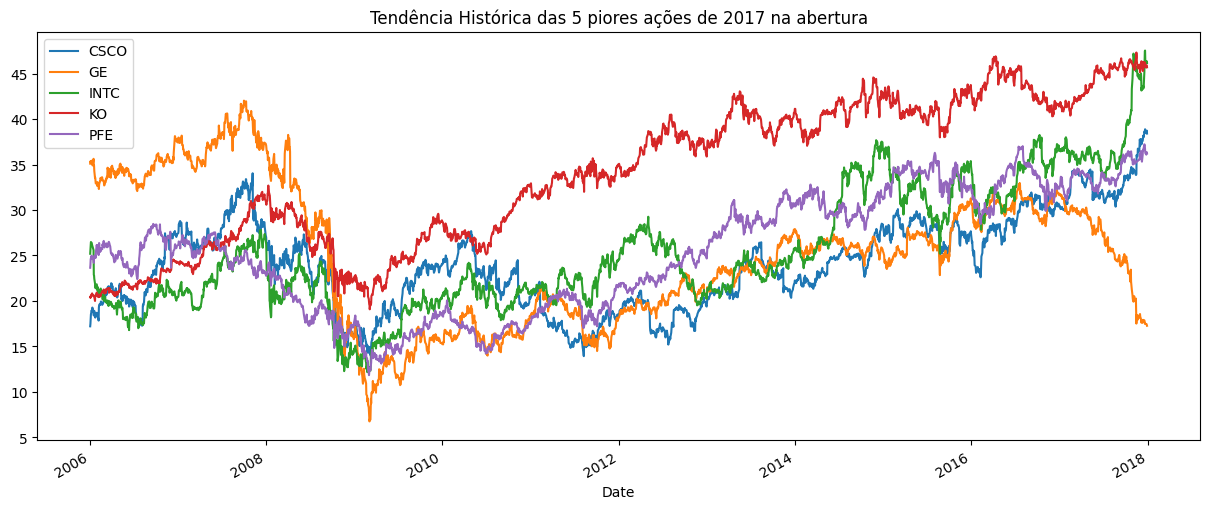

In [13]:
#filtra
filtered_df = tdf[tdf.Name.isin(ws)]
#agrupa por nome
grouped_df = filtered_df.groupby('Name')
#extrai abertura
open_prices = grouped_df.Open
open_prices.plot(title='Tendência Histórica das 5 piores ações de 2017 na abertura', legend=True)
plt.show()

In [8]:
#identifica as 5 melhores ações
best_stocks = df[df.Date == df.Date.max()].sort_values('Open', ascending=False).head(5)

In [9]:
bs = best_stocks.Name.values
bs

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

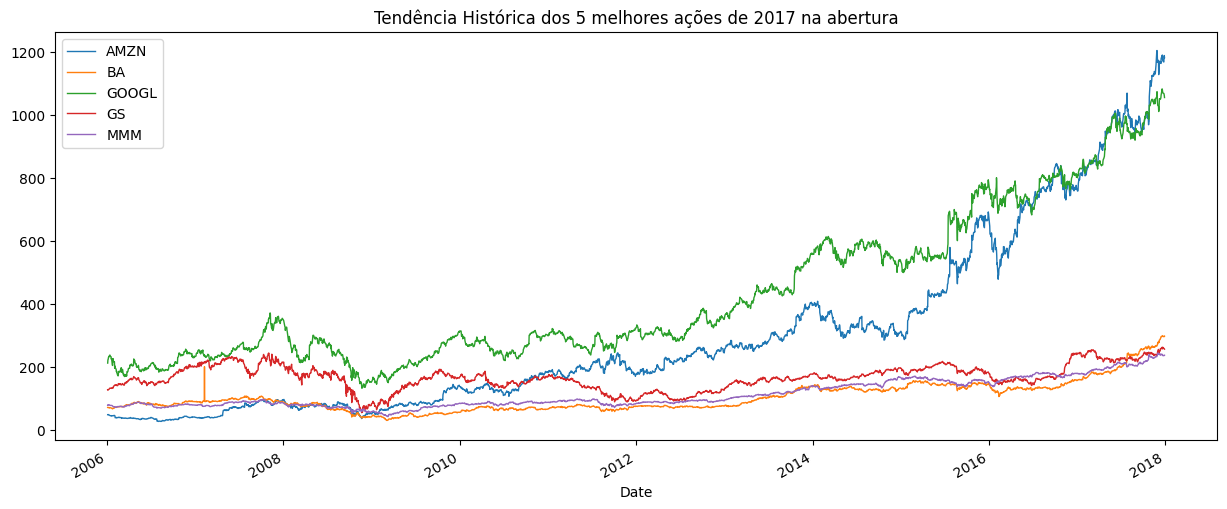

In [14]:
#visualiza as 5 melhores ações ao longo do tempo
filtered_df = tdf[tdf.Name.isin(bs)]
grouped_df = filtered_df.groupby('Name')
open_prices = grouped_df.Open
open_prices.plot(title='Tendência Histórica dos 5 melhores ações de 2017 na abertura', legend=True, linewidth=1)
plt.show()